<a href="https://colab.research.google.com/github/tameralqadi/Logistic-Regression/blob/main/logistic(Tamer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.6931471805599454
Epoch 100, Loss: 0.12069887599113824
Epoch 200, Loss: 0.0655623765674412
Epoch 300, Loss: 0.04559407453391481
Epoch 400, Loss: 0.03525128880157535
Epoch 500, Loss: 0.028899797907557506
Epoch 600, Loss: 0.024588388821941823
Epoch 700, Loss: 0.02146182614240013
Epoch 800, Loss: 0.019085622850609687
Epoch 900, Loss: 0.017215350887544424
Intercept (w0): -0.7819538004522705
Coefficients (w1, w2): [-1.93818228  4.1792836 ]


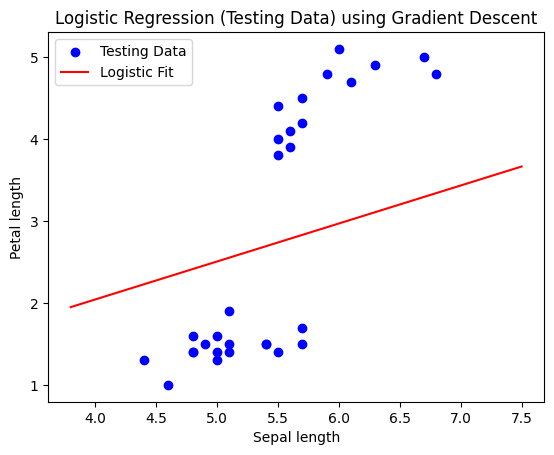

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    W = np.zeros(n + 1)  # include bias
    X_b = np.c_[np.ones((m, 1)), X]

    for epoch in range(epochs):
        y_pred = sigmoid(X_b.dot(W))
        error = y_pred - y
        gradient = (1/m) * X_b.T.dot(error)
        W -= learning_rate * gradient

        if epoch % 100 == 0:
            loss = -(1/m) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            print(f"Epoch {epoch}, Loss: {loss}")

    return W


if __name__ == "__main__":
    # 1. Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # 2. Select two classes: setosa (0) and versicolor (1)
    mask = (y == 0) | (y == 1)
    X = X[mask]
    y = y[mask]

    # 3. Use only two features (for visualization)
    X = X[:, [0, 2]]  # sepal length & petal length

    # 4. Split into training/testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 5. Train logistic regression model on training data
    weights = gradient_descent(X_train, y_train, learning_rate=0.1, epochs=1000)

    print("Intercept (w0):", weights[0])
    print("Coefficients (w1, w2):", weights[1:])

    # 6. Plot testing data points only
    plt.scatter(X_test[:, 0], X_test[:, 1], color='blue', label='Testing Data')

    # 7. Plot logistic regression line (decision boundary)
    xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    yy = -(weights[0] + weights[1]*xx)/weights[2]  # decision boundary
    plt.plot(xx, yy, color='red', label='Logistic Fit')

    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.title('Logistic Regression (Testing Data) using Gradient Descent')
    plt.legend()
    plt.show()
